In [2]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math

In [3]:
# Menampilkan Sampel Data Dan Melakukan Drop Column Tertarik
df = pd.read_csv('../Dataset/kendaraan_train_pca_clean.csv')
df.sample(5)

,Component_1,Component_2,Tertarik
134798,-1.172673,-0.945522,0
188270,-0.738075,-2.154118,0
5546,-1.854406,0.509164,0
41042,-0.462414,-2.021526,0
164593,1.557764,-0.948521,0


In [4]:
# Mengecek Data Kosong
df.isna().sum()

Component_1    0
Component_2    0
Tertarik       0
dtype: int64

## **Feature Selection**

In [5]:
df = df[['Component_1', 'Component_2']]
df.head()

,Component_1,Component_2
0,-2.162936,0.330564
1,3.149257,0.300974
2,-2.283908,0.267602
3,0.633128,0.129323
4,2.348830,0.616102


In [6]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(df))

Total Data : 285662


## **K-MEANS Algorithm**

In [7]:
# Mendefinisikan Metode Euclidean Untuk Perhitungan Jarak Dari Centroid
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))


def kmeans(k, max_iter, df):
    # Inisialisasi Dictionary Centroid Kemudian Memilih Centroid Secara Random Pada Data 
    # Sesuai Banyaknya Cluster Yang Didefinisikan
    centroid = {i: df[random.randint(0, len(df))] for i in range(k)}
    print(f'Inisialisasi Centroid Random:\n{centroid} \n')

    for i in range(max_iter):
        # Mendefinisikan Dictionary Cluster Dan Mengisi Setiap Key 
        # Pada Cluster Berisi Array kosong, contoh : {0: [], 1: [], 2: []}
        cluster = {i: [] for i in range(k)}

        # Mencari Nilai Terdekat Pada Data Untuk Setiap Centroid Yang Telah Di Definisikan Sebelumnya
        # Menggunakan Metode Euclidean Dan Mencari Nilai Minimum Pada Setiap Distance 
        # Untuk Dimasukkan Kedalam Dictionary Cluster
        for x in df:
            dist = [euclidean(x, centroid[c]) for c in centroid]
            cluster[dist.index(min(dist))].append(x)

        # Mencari Nilai Centroid Ulang Dari Setiap Cluster 
        # Yang Telah Dicari Sebelumnya Menggunakan Mean 
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)

        print(f'Iterasi Centroid Ke-{i+1}:\n{centroid} \n')

    # Mengembalikan Nilai Dari Variabel Centroid Dan Cluster
    return centroid, cluster


## **Main Program**

In [8]:
# Merubah DataFrame Menjadi Numpy Array
data = df.to_numpy()

# Memasukkan Nilai K dan Maksimum Iterasi
k = 4
max_iter = 100

# Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
centroid, cluster = kmeans(k, max_iter, data)

Inisialisasi Centroid Random:
{0: array([ 1.05074122, -1.02484023]), 1: array([ 0.61138201, -1.27819514]), 2: array([-2.04411943,  0.36467645]), 3: array([ 0.71289754, -1.28691727])} 

Iterasi Centroid Ke-1:
{0: array([1.71781767, 0.05900037]), 1: array([-0.31341035, -1.66509981]), 2: array([-1.48408961,  0.59737234]), 3: array([ 0.80767052, -1.37517647])} 

Iterasi Centroid Ke-2:
{0: array([1.8135557 , 0.44251312]), 1: array([-0.64403163, -1.67820194]), 2: array([-1.56854541,  0.60753422]), 3: array([ 0.92649847, -1.06061446])} 

Iterasi Centroid Ke-3:
{0: array([1.79505441, 0.71125832]), 1: array([-0.68483797, -1.65349448]), 2: array([-1.67484967,  0.559639  ]), 3: array([ 1.01804721, -0.90318411])} 

Iterasi Centroid Ke-4:
{0: array([1.72633375, 0.89591984]), 1: array([-0.67053696, -1.64573935]), 2: array([-1.74375759,  0.51398061]), 3: array([ 1.12307424, -0.81376194])} 

Iterasi Centroid Ke-5:
{0: array([1.64190326, 1.05544195]), 1: array([-0.64734726, -1.6386943 ]), 2: array([-1.

## **Hasil Proses Cluster Final**

In [9]:
# Inisialisasi Array Untuk Dat Cluster
df = []

# Melakukan Perulangan Untuk Setiap Key Pada Data
# Hasil Proses K-Means Untuk Diinputkan Kedalam Array Cluster (df)
for key in cluster.keys():
    for c in cluster.get(key):
        df.append((c[0], c[1], key))

# Set Array df menjadi dataframe, Menamakan nama kolom dan menampilkannya
df = pd.DataFrame(df)
df.columns = ['Component_1', 'Component_2', 'Cluster']
df.sample(10)

,Component_1,Component_2,Cluster
101800,-1.260866,-1.040362,1
25333,0.210436,1.985846,0
142838,-1.771144,0.367316,2
126123,-2.407723,0.172597,2
129499,-2.194314,0.455591,2
249092,1.390891,-0.773822,3
242208,2.023788,0.081449,3
174797,-1.524840,-0.964670,2
220342,1.152558,-0.892546,3
248358,2.731869,-0.090451,3


In [10]:
# Menampilkan Letak Seluruh Centroids
for i in range(k):
    print(f'Centroid {i+1} :', centroid[i])

Centroid 1 : [0.32403548 1.67468256]
Centroid 2 : [-0.02284718 -1.52398178]
Centroid 3 : [-1.98239786  0.23248793]
Centroid 4 : [ 1.95319163 -0.17880753]


In [11]:
# Memetakkan Nilai X Dan Y Untuk Setiap Data Pada Dictionary Cluster
clusterize = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster.items()]))

# Membuat Nama Kolom Cluster Berdasarkan Jumlah Cluster Pada Clusterize
col = []
for i in range(len(clusterize.columns)):
    col.append('Cluster ' + str(i + 1))

# Melakukan Set Nama Kolom Dan Menampilkan Sample Data Cluster
clusterize.columns = col
clusterize.sample(8)


,Cluster 1,Cluster 2,Cluster 3,Cluster 4
56731,NaN,"[0.6490620794572551, -1.3902170750983722]","[-1.8009436587544816, 0.6699135993668102]","[1.3881783772283702, -0.8144812047767143]"
73424,NaN,NaN,"[-2.2341033218919084, 0.3310463736931866]","[1.9527932373225227, -0.220059342145243]"
83968,NaN,NaN,"[-1.8501836988781128, 0.7740977977878595]","[1.1531369159528402, 0.6492432001293942]"
61595,NaN,NaN,"[-2.405690704867433, 0.1125486671880402]","[1.1114922646798049, -0.8145699972875092]"
9293,"[-0.188247947449107, 1.2832047217596871]","[-0.6052680898470404, -2.03552964145414]","[-2.219956810958551, 0.2979838934040141]","[2.0692960224806085, 0.1227121152594153]"
41176,"[0.6030269936552014, 2.4692174740306]","[-0.6432772638375179, -0.2594324262123521]","[-2.3709112471384355, 0.2350937690116476]","[2.2991917360382543, -0.2860942171104481]"
79800,NaN,NaN,"[-2.229724747096454, 0.2925699417676377]","[1.3777213908061483, -0.8283100854618562]"
58605,NaN,"[0.4680896698031043, -0.5276138216693387]","[-1.6784321261165014, -0.1565729066224174]","[1.371252614488956, 0.1075151525969137]"


## **Visualisasi Cluster**

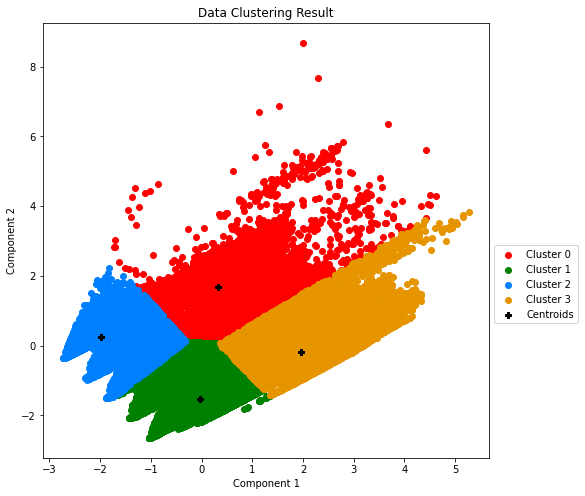

In [12]:
# Set Warna Setiap CLuster
colors = ['r', 'g', '#0080ff', '#e69500', '#e89500']

# Set Ukuran Dan Judul Plot
plt.figure(figsize=(8, 8))
plt.title('Data Clustering Result')

# Melakukan Looping Setiap Titik Data Dan Centroid
for i in range(k):
    plt.scatter(
        df['Component_1'][df['Cluster'] == i], 
        df['Component_2'][df['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )

    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')

# Acuan Penampilan Label Centroid
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')

# Set Nama Label X Dan Y Pada Plot Dan Set Tempat Legend Ditampilkan
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


## **Evaluasi Model**

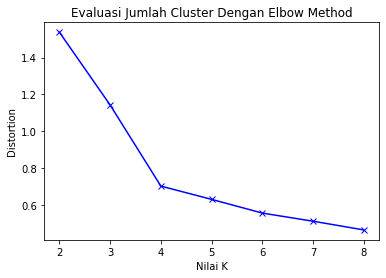

In [13]:
# Inisialisasi Array Untuk Distortion
distortions = []

# Inisialisasi Range K
K = range(2, 9)

# Melakukan Perulangan Untuk Setiap Range
for i in K:
    # Membangun Dan Fit Dataset
    model = KMeans(n_clusters=i).fit(df)
    model.fit(df)

    # Memasukkan Hasil Dari Jumlah cdist data, cluster_center Ke Array
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot data
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Distortion')
plt.title('Evaluasi Jumlah Cluster Dengan Elbow Method')
plt.show()